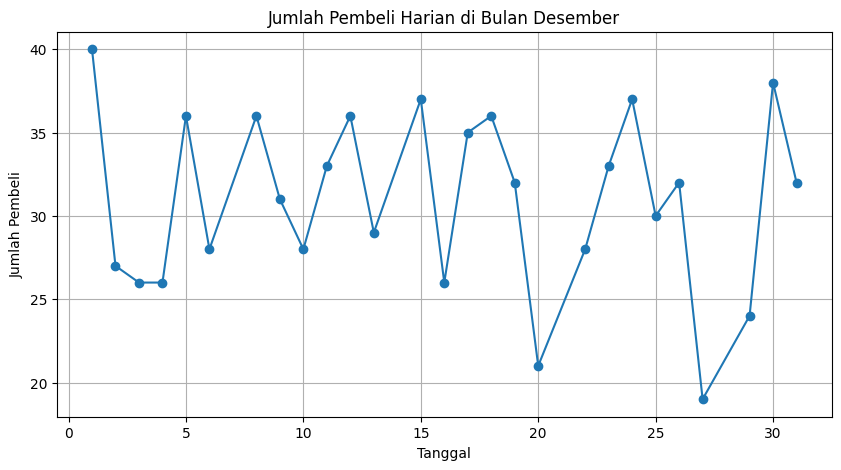

In [44]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('retail_raw_reduced.csv')

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data untuk bulan Desember
df_december = df[df['order_date'].dt.month == 12]

# Menghitung jumlah unique customers per tanggal
daily_customers = df_december.groupby(df_december['order_date'].dt.day)['customer_id'].nunique()

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Membuat line chart
plt.plot(daily_customers.index, daily_customers.values, marker='o', linestyle='-')

# Memberikan judul dan label pada sumbu-sumbu
plt.title('Jumlah Pembeli Harian di Bulan Desember')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pembeli')

# Menampilkan grid
plt.grid(True)

# Menampilkan line chart
plt.show()

In [202]:
# Memfilter data untuk bulan Desember
data_penjualan_december = df_december

# Menghitung total kuantitas terjual per brand
total_quantity_per_brand = data_penjualan_december.groupby('brand')['quantity'].sum().reset_index()

# Mengurutkan brand berdasarkan total kuantitas terjual secara menurun
dataset_top5brand_dec = total_quantity_per_brand.nlargest(5, 'quantity')

# Menambahkan kolom jumlah quantity
dataset_top5brand_dec['quantity'] = dataset_top5brand_dec['quantity']

# Menampilkan list dengan format yang diminta
print("5 Brand Penjualan Tertinggi pada Bulan Desember:")
for index, row in dataset_top5brand_dec.iterrows():
    print(f"{row['brand']}: {row['quantity']}")

5 Brand Penjualan Tertinggi pada Bulan Desember:
BRAND_S: 2197
BRAND_P: 2194
BRAND_R: 1508
BRAND_C: 1365
BRAND_A: 1315


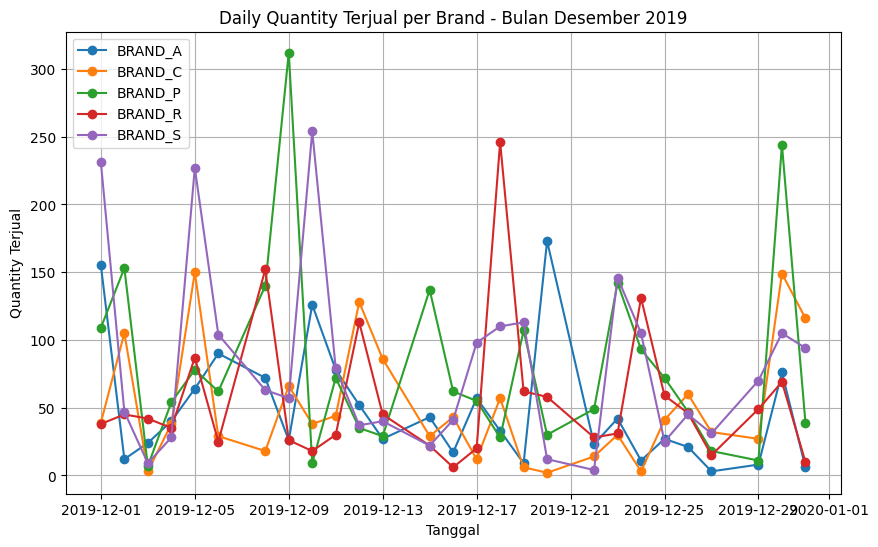

In [189]:
# Mengambil data penjualan untuk top 5 brand pada bulan Desember 2019
data_penjualan_top5brand_dec = data_penjualan_december[data_penjualan_december['brand'].isin(dataset_top5brand_dec['brand'])]

# Menghitung daily quantity terjual per brand
daily_quantity_per_brand = data_penjualan_top5brand_dec.groupby(['order_date', 'brand'])['quantity'].sum().unstack()

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat multi-line chart
for brand in daily_quantity_per_brand.columns:
    plt.plot(daily_quantity_per_brand.index, daily_quantity_per_brand[brand], marker='o', linestyle='-', label=brand)

# Memberikan judul dan label pada sumbu-sumbu
plt.title('Daily Quantity Terjual per Brand - Bulan Desember 2019')
plt.xlabel('Tanggal')
plt.ylabel('Quantity Terjual')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan multi-line chart
plt.show()


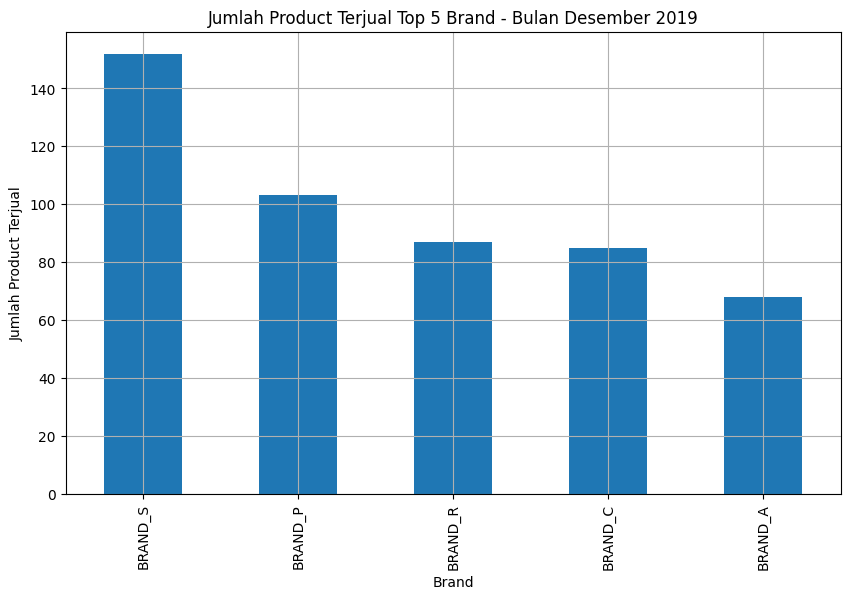

In [201]:
# Menghitung jumlah product terjual per brand pada bulan Desember 2019
jumlah_product_per_brand = data_penjualan_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat bar chart
jumlah_product_per_brand.plot(kind='bar')

# Memberikan judul dan label pada sumbu-sumbu
plt.title('Jumlah Product Terjual Top 5 Brand - Bulan Desember 2019')
plt.xlabel('Brand')
plt.ylabel('Jumlah Product Terjual')
plt.grid(True)

# Menampilkan bar chart
plt.show()

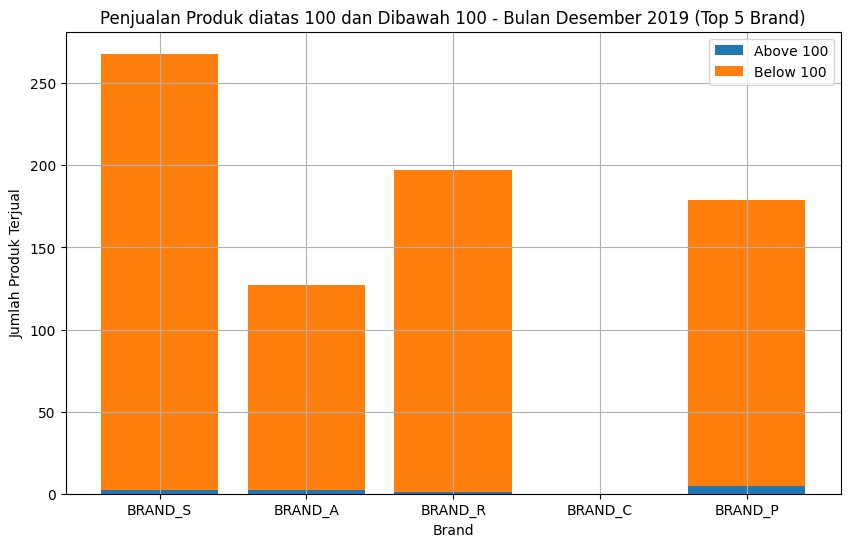

In [200]:
# Menghitung jumlah produk di atas 100 dan di bawah 100 terjual per brand
df_above_100 = df_december[df_december['quantity'] >= 100]
df_below_100 = df_december[df_december['quantity'] < 100]

above_100_per_brand = df_above_100.groupby('brand')['product_id'].count().reindex(data_penjualan_top5brand_dec['brand'])
below_100_per_brand = df_below_100.groupby('brand')['product_id'].count().reindex(data_penjualan_top5brand_dec['brand'])

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat stacked chart
plt.bar(data_penjualan_top5brand_dec['brand'], above_100_per_brand, label='Above 100')
plt.bar(data_penjualan_top5brand_dec['brand'], below_100_per_brand, bottom=above_100_per_brand, label='Below 100')

# Memberikan judul dan label pada sumbu-sumbu
plt.title('Penjualan Produk diatas 100 dan Dibawah 100 - Bulan Desember 2019 (Top 5 Brand)')
plt.xlabel('Brand')
plt.ylabel('Jumlah Produk Terjual')
plt.grid(True)

# Menambahkan legenda
plt.legend()

# Menampilkan stacked chart
plt.show()


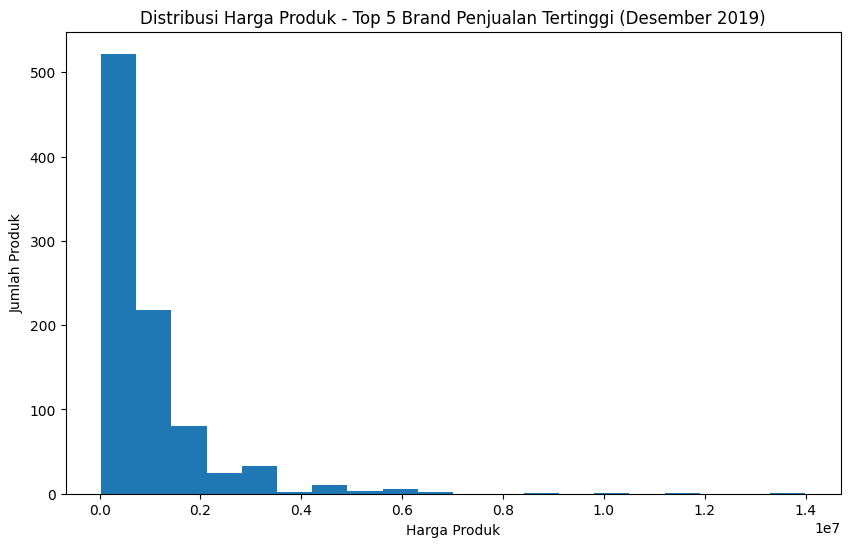

In [182]:
# Mengambil data produk dari top 5 brand penjualan tertinggi
data_top5_brand_products = df[df['brand'].isin(data_top5brand_dec['brand'])]

# Menghitung median harga produk untuk tiap product_id
median_prices = data_top5_brand_products.groupby('product_id')['item_price'].median()

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat histogram
plt.hist(median_prices, bins=20)

# Memberikan judul dan label pada sumbu-sumbu
plt.title('Distribusi Harga Produk - Top 5 Brand Penjualan Tertinggi (Desember 2019)')
plt.xlabel('Harga Produk')
plt.ylabel('Jumlah Produk')

# Menampilkan histogram
plt.show()


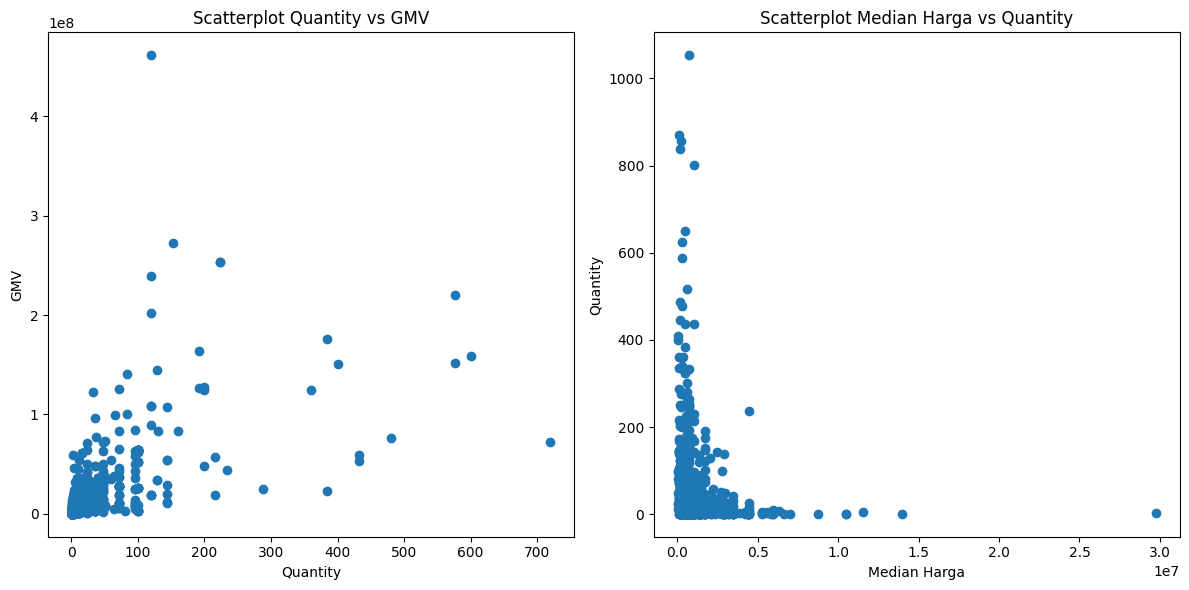

In [185]:
# Menghitung GMV (Gross Merchandise Value) = quantity * price
df['GMV'] = df['quantity'] * df['item_price']

# Mengatur ukuran figure
plt.figure(figsize=(12, 6))

# Scatterplot quantity vs GMV
plt.subplot(1, 2, 1)
plt.scatter(df['quantity'], df['GMV'])
plt.title('Scatterplot Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')

# Scatterplot median harga vs quantity
plt.subplot(1, 2, 2)
plt.scatter(df.groupby('product_id')['item_price'].median(), df.groupby('product_id')['quantity'].sum())
plt.title('Scatterplot Median Harga vs Quantity')
plt.xlabel('Median Harga')
plt.ylabel('Quantity')

# Menampilkan scatterplot
plt.tight_layout()
plt.show()
